In [1]:
#Prediction using ANN

In [2]:
import pandas as pd

In [3]:
#Load data
df = pd.read_csv('Churn_Modelling.csv', index_col=0)

x = df.drop(['Exited'], axis=1)
y = df['Exited']
x = x.drop(['CustomerId', 'Surname'], axis=1)

In [4]:
#Dummy encoding
geo = pd.get_dummies(x['Geography'], drop_first=True)
gen = pd.get_dummies(x['Gender'], drop_first=True)

x = x.drop(['Geography', 'Gender'], axis=1)
x = pd.concat([x, geo, gen], axis=1)

In [5]:
#Split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#ANN Model
model = Sequential()

model.add(Dense(6, activation='relu', input_dim=11))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Pro


2023-05-15 20:20:44.962880: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-15 20:20:44.963050: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10


2023-05-15 20:20:45.183226: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-15 20:20:45.343112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


248/250 [============================>.] - ETA: 0s - loss: 2444.4956 - accuracy: 0.4773

2023-05-15 20:20:47.356696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 3s 9ms/step - loss: 2425.1646 - accuracy: 0.4795 - val_loss: 41.3826 - val_accuracy: 0.7675
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 5.4810 - accuracy: 0.7921 - val_loss: 0.6477 - val_accuracy: 0.7890
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.5943 - accuracy: 0.7964 - val_loss: 0.5960 - val_accuracy: 0.7895
Epoch 4/10
250/250 [==============================] - 2s 8ms/step - loss: 0.5664 - accuracy: 0.7968 - val_loss: 0.5730 - val_accuracy: 0.7895
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 0.5459 - accuracy: 0.7970 - val_loss: 0.5566 - val_accuracy: 0.7895
Epoch 6/10
250/250 [==============================] - 2s 8ms/step - loss: 0.5311 - accuracy: 0.7972 - val_loss: 0.5451 - val_accuracy: 0.7895
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 0.5209 - accuracy: 0.7974 - val_loss: 0.5373 - val_accuracy: 0.7895
Epoch 8/10
25

In [9]:
print("Accuracy:",hist.history['accuracy'][-1])

Accuracy: 0.7976250052452087


In [10]:
import matplotlib.pyplot as plt

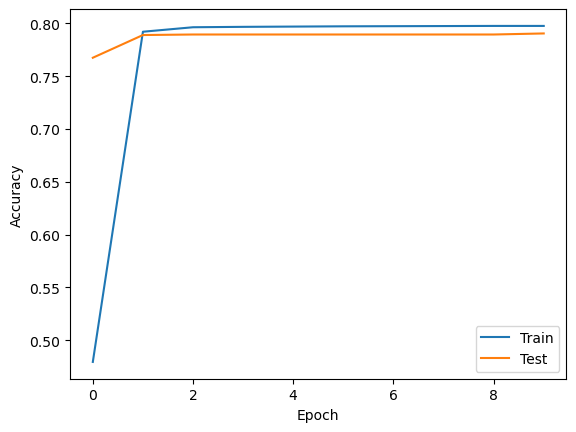

In [11]:
#Plotting
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

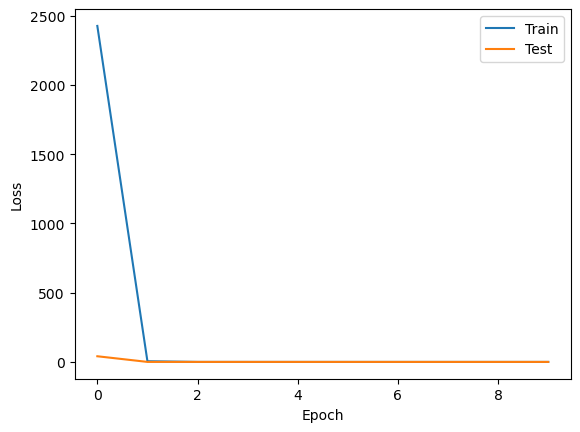

In [12]:
plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()